In [11]:
from model import *
from data import *
from PIL import Image

## Train your Unet with membrane data
membrane data is in folder membrane/, it is a binary classification task.

The input shape of image and mask are the same :(batch_size,rows,cols,channel = 1)

### Train with data generator

In [2]:
data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
myGene = trainGenerator(2,'data/membrane/train','image','label',data_gen_args,save_to_dir = None)
model = unet()
model_checkpoint = ModelCheckpoint('unet_membrane.hdf5', monitor='loss',verbose=1, save_best_only=True)
model.fit_generator(myGene,steps_per_epoch=2000,epochs=5,callbacks=[model_checkpoint])

C:\Users\xuhaozhi\Documents\Study\unet\model.py:34: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  merge6 = merge([drop4,up6], mode = 'concat', concat_axis = 3)
C:\SoftWare\Anaconda2\envs\python3\lib\site-packages\keras\legacy\layers.py:465: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  name=name)
C:\Users\xuhaozhi\Documents\Study\unet\model.py:39: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  merge7 = merge([conv3,up7], mode = 'concat', concat_axis = 3)
C:\Users\xuhaozhi\Documents\Study\unet\model.py:44: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `

Epoch 1/5
Found 30 images belonging to 1 classes.
Found 30 images belonging to 1 classes.
2000/2000 [==============================] - 538s 269ms/step - loss: 0.1951 - acc: 0.9140

Epoch 00001: loss improved from inf to 0.19511, saving model to unet_membrane.hdf5
Epoch 2/5
2000/2000 [==============================] - 535s 268ms/step - loss: 0.1210 - acc: 0.9469

Epoch 00002: loss improved from 0.19511 to 0.12099, saving model to unet_membrane.hdf5
Epoch 3/5
2000/2000 [==============================] - 534s 267ms/step - loss: 0.0926 - acc: 0.9596

Epoch 00003: loss improved from 0.12099 to 0.09256, saving model to unet_membrane.hdf5
Epoch 4/5
2000/2000 [==============================] - 534s 267ms/step - loss: 0.0788 - acc: 0.9656

Epoch 00004: loss improved from 0.09256 to 0.07882, saving model to unet_membrane.hdf5
Epoch 5/5
2000/2000 [==============================] - 534s 267ms/step - loss: 0.0707 - acc: 0.9691

Epoch 00005: loss improved from 0.07882 to 0.07074, saving model to une

### Train with npy file

In [ ]:
#imgs_train,imgs_mask_train = geneTrainNpy("data/membrane/train/aug/","data/membrane/train/aug/")
#model.fit(imgs_train, imgs_mask_train, batch_size=2, nb_epoch=10, verbose=1,validation_split=0.2, shuffle=True, callbacks=[model_checkpoint])

### test your model and save predicted results

In [3]:
testGene = testGenerator("data/membrane/test")
model = unet()
model.load_weights("unet_membrane.hdf5")
results = model.predict_generator(testGene,30,verbose=1)
saveResult("data/membrane/test",results)

C:\Users\xuhaozhi\Documents\Study\unet\model.py:34: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  merge6 = merge([drop4,up6], mode = 'concat', concat_axis = 3)
C:\SoftWare\Anaconda2\envs\python3\lib\site-packages\keras\legacy\layers.py:465: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  name=name)
C:\Users\xuhaozhi\Documents\Study\unet\model.py:39: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  merge7 = merge([conv3,up7], mode = 'concat', concat_axis = 3)
C:\Users\xuhaozhi\Documents\Study\unet\model.py:44: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `

 1/30 [>.............................] - ETA: 4s

C:\SoftWare\Anaconda2\envs\python3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\SoftWare\Anaconda2\envs\python3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


30/30 [==============================] - 1s 47ms/step


C:\SoftWare\Anaconda2\envs\python3\lib\site-packages\skimage\util\dtype.py:130: UserWarning: Possible precision loss when converting from float32 to uint16
  .format(dtypeobj_in, dtypeobj_out))


# Load Weights from before

In [8]:
model = unet()
model.load_weights("unet_alltrainRoad.hdf5")

# Plot a test image

In [3]:
def predImgGen(imgPath, target_size=(256,256)):
    img = io.imread(imgPath,as_gray = True)
    img = img / 255
    img = trans.resize(img,target_size)
    img = np.reshape(img,img.shape+(1,))
    img = np.reshape(img,(1,)+img.shape)
    return img

In [4]:
PANImgPath = '/data/spacenet/road/AOI_3_Paris/PAN-8BIT/SN3_roads_train_AOI_3_Paris_PAN_img313.tif'
testImg = predImgGen(PANImgPath)

## Predict Test Image

In [38]:
pred = model.predict(testImg)

In [42]:
pred

array([[[[6.05899692e-02],
         [2.06283629e-02],
         [1.60646141e-02],
         ...,
         [1.22769475e-02],
         [1.99126601e-02],
         [6.03178144e-02]],

        [[2.35205591e-02],
         [1.71532035e-02],
         [1.59484148e-02],
         ...,
         [5.31581044e-03],
         [7.23096728e-03],
         [1.35270655e-02]],

        [[1.65442526e-02],
         [1.12241805e-02],
         [1.34254992e-02],
         ...,
         [4.12598252e-03],
         [5.04809618e-03],
         [6.46263361e-03]],

        ...,

        [[2.67365575e-03],
         [7.30484724e-04],
         [3.10003757e-04],
         ...,
         [5.62939286e-01],
         [4.55964178e-01],
         [3.80653292e-01]],

        [[4.97081876e-03],
         [1.31538510e-03],
         [6.09129667e-04],
         ...,
         [5.58756649e-01],
         [4.55010712e-01],
         [3.88755322e-01]],

        [[1.49651766e-02],
         [3.78462672e-03],
         [1.57332420e-03],
         ...,
 

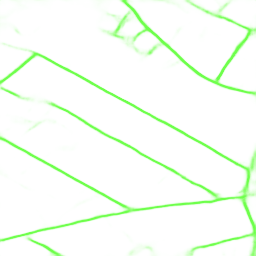

In [43]:
maskArr = pred.reshape(256,256)

maskArrThresh = np.zeros((maskArr.shape[0], maskArr.shape[1], 4))
for row in range(0, maskArr.shape[0]):
    for col in range(0, maskArr.shape[1]):
        #if maskarr[row, col] < 0.: 
        maskArrThresh[row, col, 0] = 50 
        maskArrThresh[row, col, 1] = 255 
        maskArrThresh[row, col, 2] = 0 
        maskArrThresh[row, col, 3] = int(maskArr[row, col] * 255)
        #else: #maskArrThresh[row, col, 0:3] = 255 # maskArrThresh[row, col, 3] = 0

maskArrThresh = maskArrThresh.astype("uint8")
maskImg = Image.fromarray(maskArrThresh, 'RGBA')
maskImg

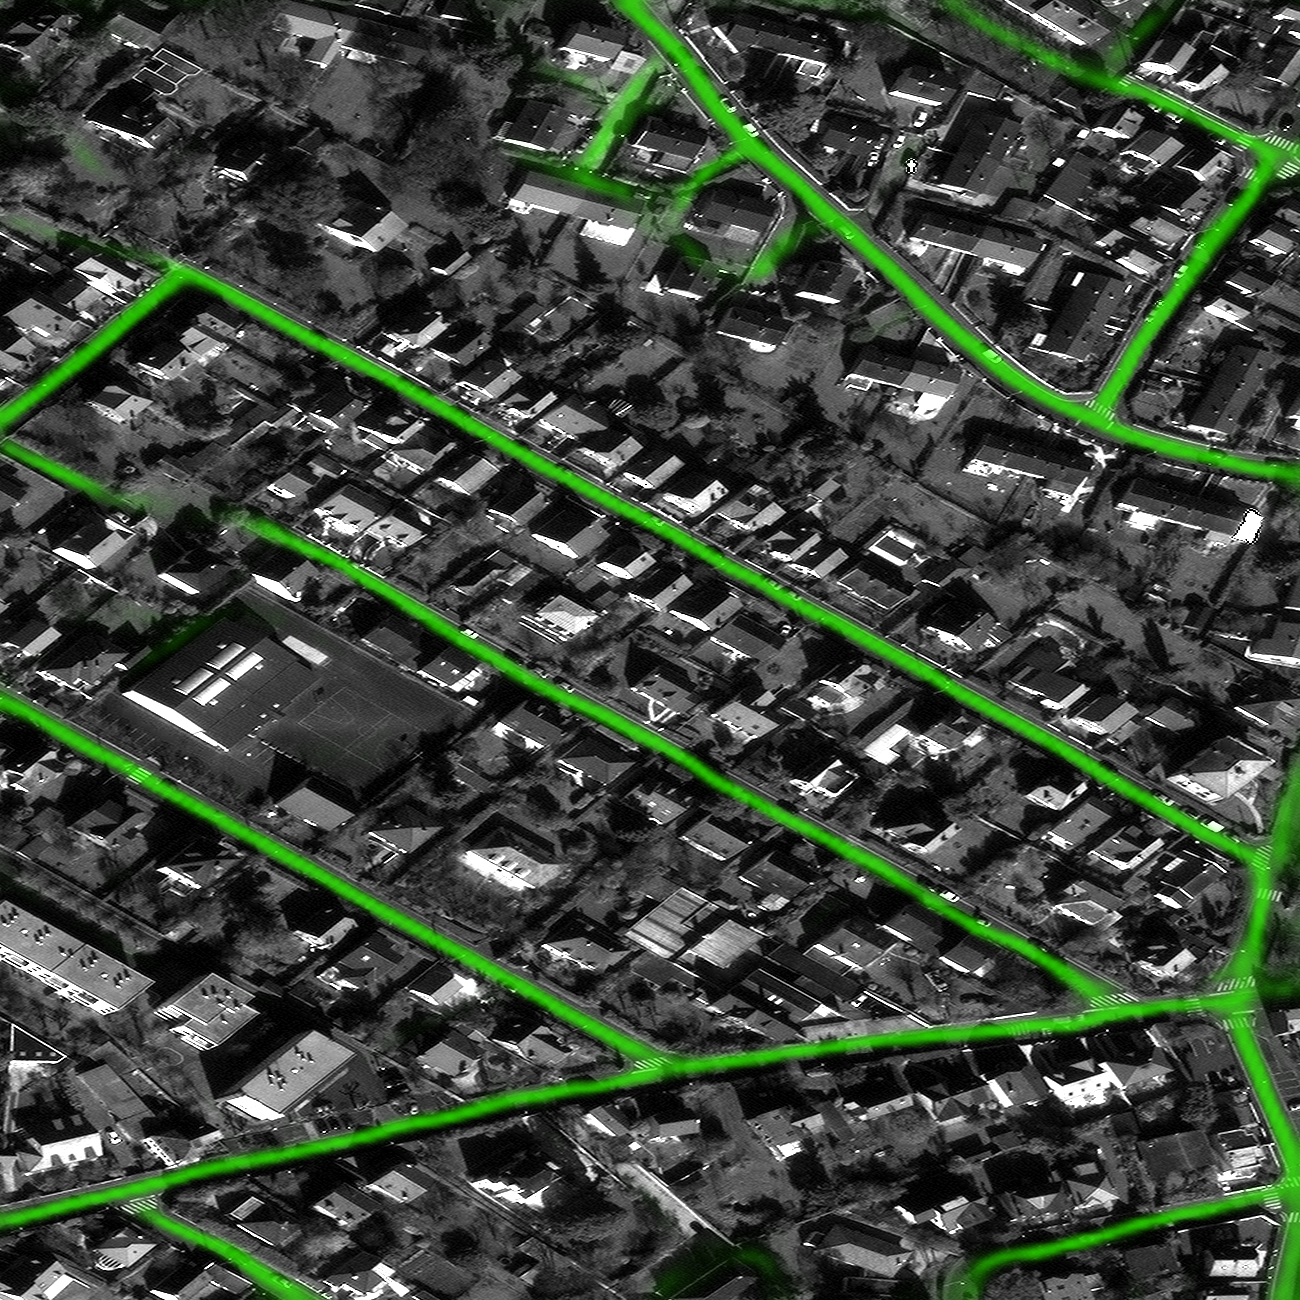

In [41]:
PANDim = (PANImg.width, PANImg.height) 
maskImgResize = maskImg.resize(PANDim)

comp = Image.alpha_composite(PANImgT,maskImgResize)
comp